In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import os
from PIL import Image
from tqdm import tqdm

# Define paths
input_directory = '/content/drive/MyDrive/rice leaf/Data'  # Replace with your dataset's directory path
output_directory = '/content/resized_rice_leaf_diseases'

# Create output directory if it doesn't exist
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# Resize images and save them
def resize_images(input_dir, output_dir, size=(128, 128)):
    for subclass in os.listdir(input_dir):
        subclass_path = os.path.join(input_dir, subclass)
        if os.path.isdir(subclass_path):
            output_subclass_path = os.path.join(output_dir, subclass)
            os.makedirs(output_subclass_path, exist_ok=True)
            for img_name in tqdm(os.listdir(subclass_path), desc=f"Processing {subclass}"):
                img_path = os.path.join(subclass_path, img_name)
                try:
                    with Image.open(img_path) as img:
                        img_resized = img.resize(size)
                        img_resized.save(os.path.join(output_subclass_path, img_name))
                except Exception as e:
                    print(f"Error processing {img_name}: {e}")

# Run the function
resize_images(input_directory, output_directory)

print("Resizing complete. Resized images saved to:", output_directory)


Processing Brown-spot: 100%|██████████| 1/1 [00:00<00:00,  5.92it/s]

Error processing Brown spot: [Errno 21] Is a directory: '/content/drive/MyDrive/rice leaf/Data/Brown-spot/Brown spot'
Resizing complete. Resized images saved to: /content/resized_rice_leaf_diseases



Comparing images in subclass: Leaf smut
Image: DSC_0308.JPG
Original size: (3081, 897), Resized size: (128, 128)


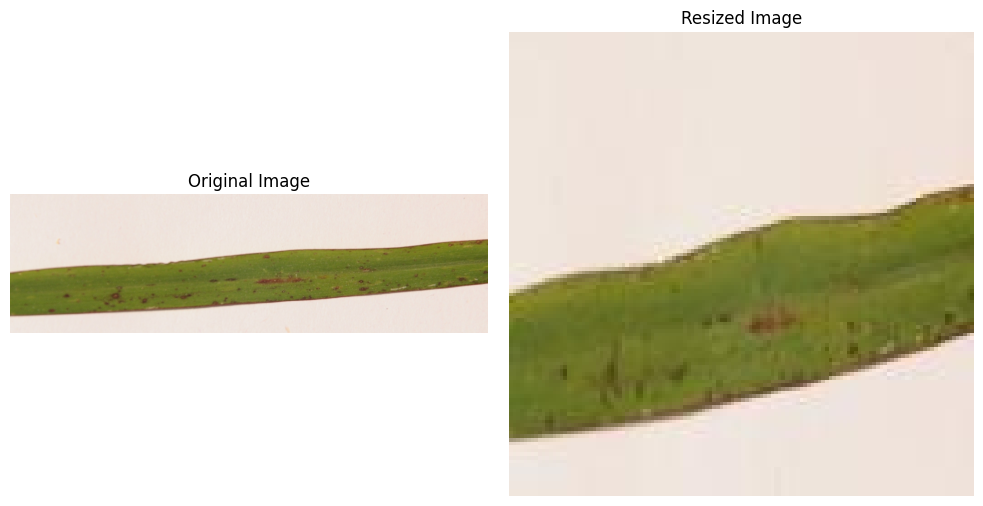

Image: DSC_0309.JPG
Original size: (3081, 897), Resized size: (128, 128)


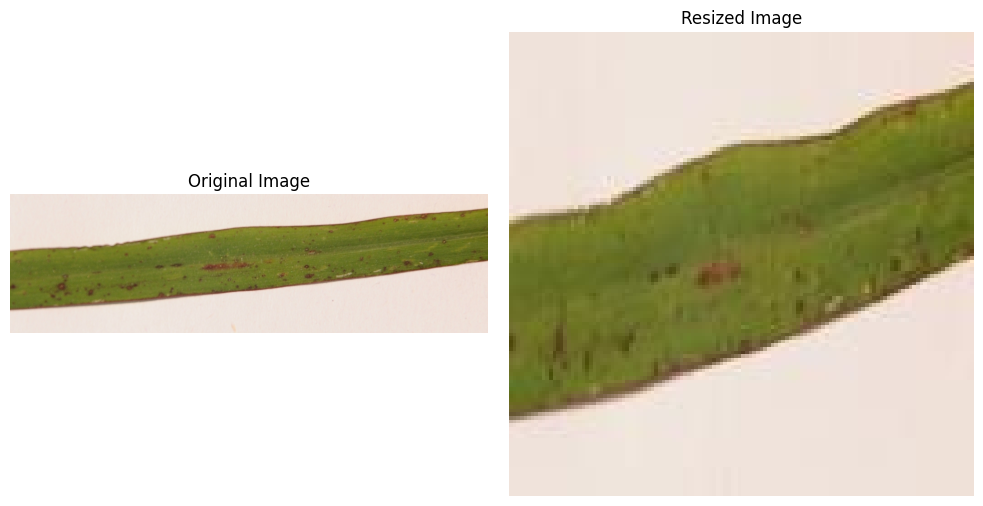

Image: DSC_0316.JPG
Original size: (3081, 897), Resized size: (128, 128)


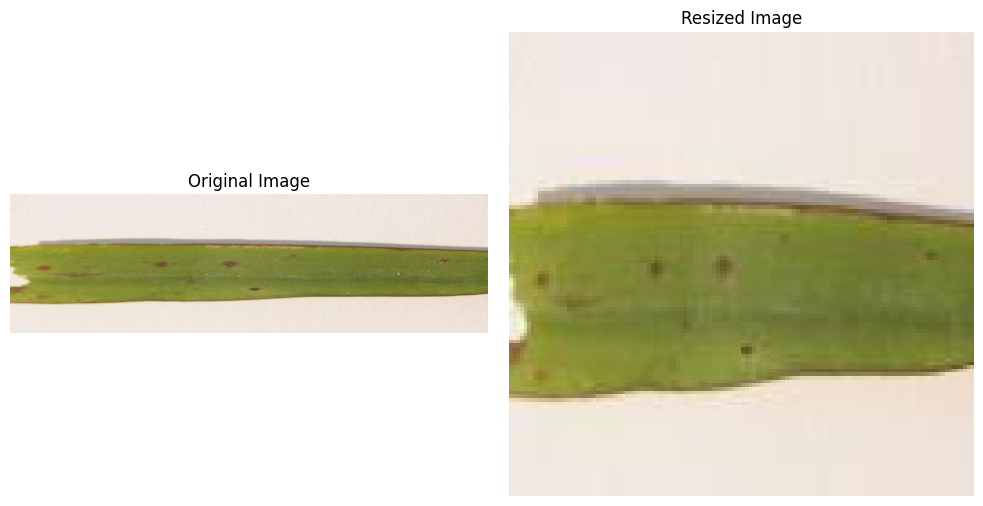

Image: DSC_0327.JPG
Original size: (3081, 897), Resized size: (128, 128)


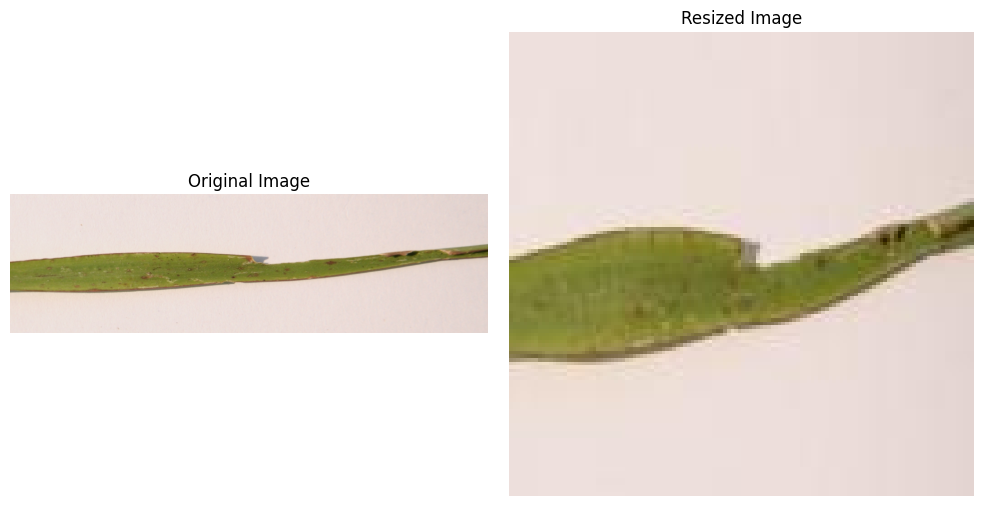

Image: DSC_0338.JPG
Original size: (3081, 897), Resized size: (128, 128)


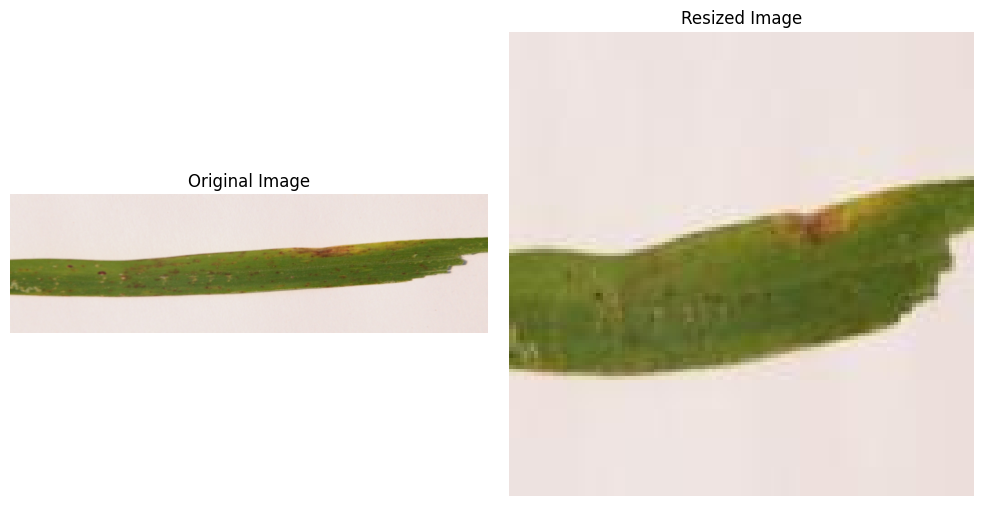


Comparing images in subclass: Bacterial leaf blight
Image: DSC_0377.JPG
Original size: (3081, 897), Resized size: (128, 128)


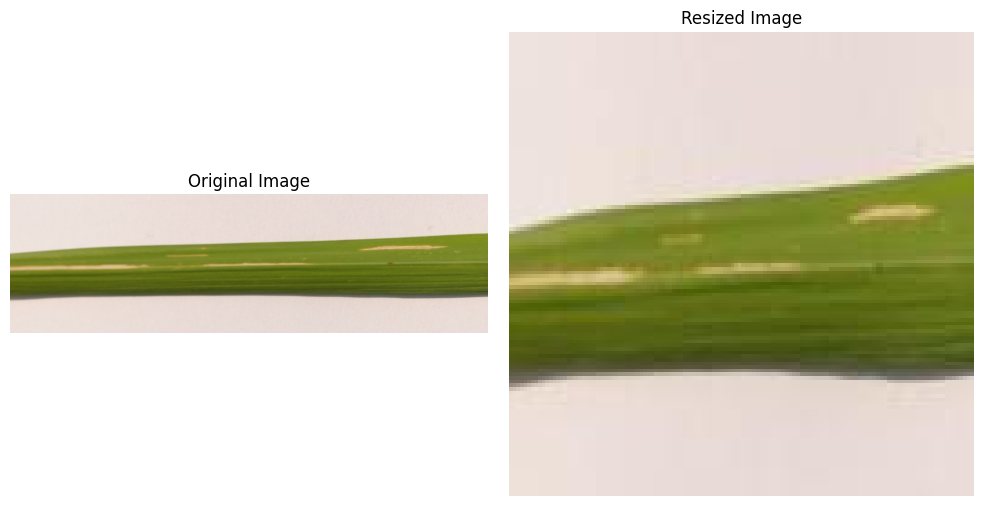

Image: DSC_0378.JPG
Original size: (3081, 897), Resized size: (128, 128)


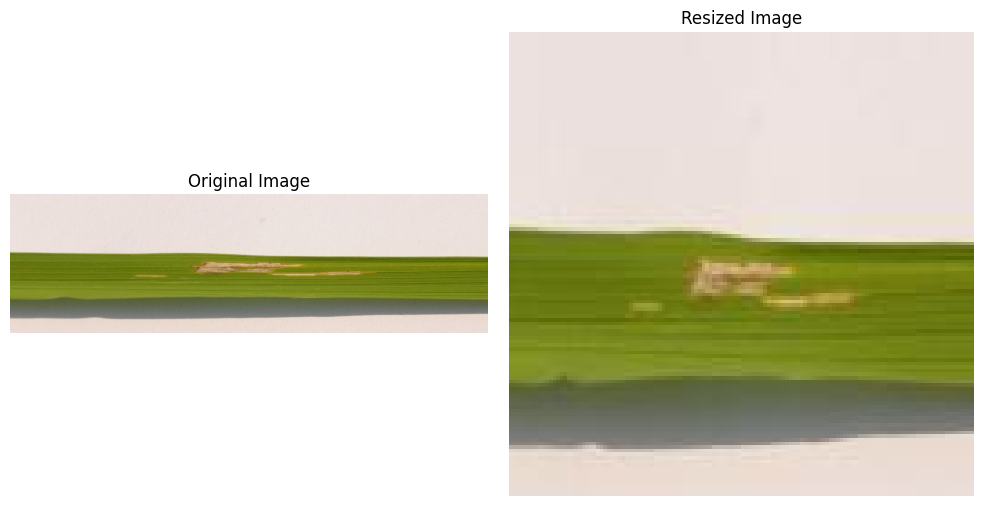

Image: DSC_0379.JPG
Original size: (3081, 897), Resized size: (128, 128)


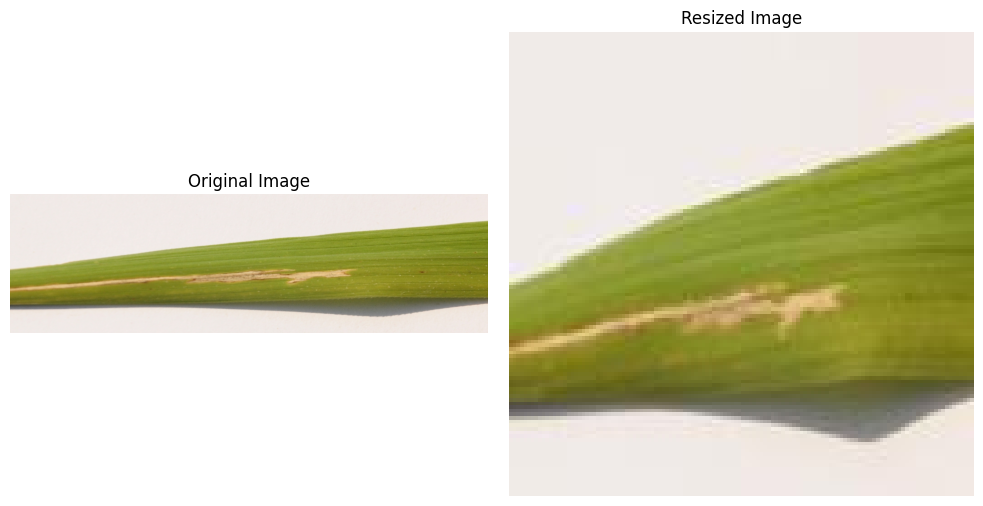

Image: DSC_0365.JPG
Original size: (3081, 897), Resized size: (128, 128)


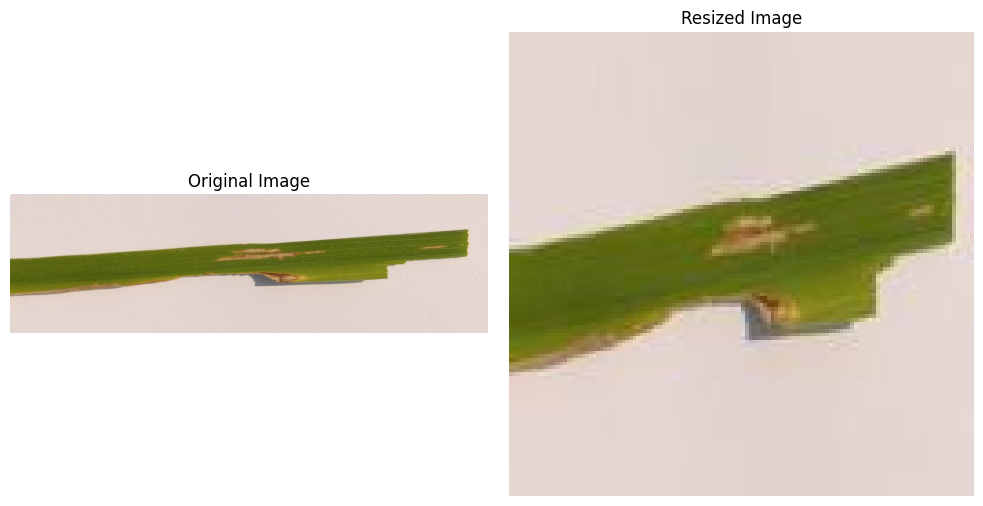

Image: DSC_0373.JPG
Original size: (3081, 897), Resized size: (128, 128)


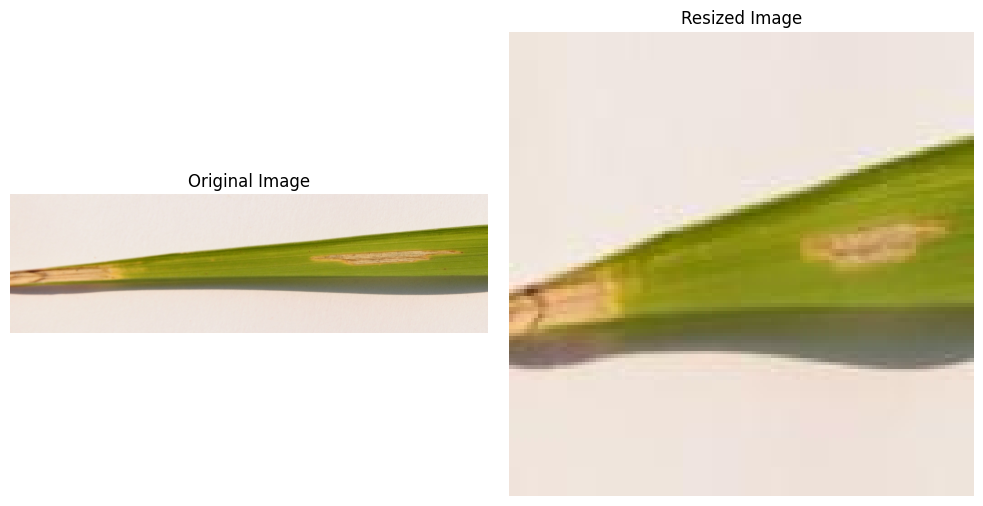


Comparing images in subclass: Brown-spot
Error processing Brown spot: [Errno 21] Is a directory: '/content/drive/MyDrive/rice leaf/Data/Brown-spot/Brown spot'


In [5]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Define paths
original_directory = '/content/drive/MyDrive/rice leaf/Data'  # Replace with your dataset's original directory
resized_directory = '/content/resized_rice_leaf_diseases'

# Function to compare original and resized images
def compare_images(original_dir, resized_dir, num_samples=5):
    subclasses = os.listdir(original_dir)
    for subclass in subclasses:
        original_subclass_path = os.path.join(original_dir, subclass)
        resized_subclass_path = os.path.join(resized_dir, subclass)

        if os.path.isdir(original_subclass_path):
            original_images = os.listdir(original_subclass_path)
            resized_images = os.listdir(resized_subclass_path)

            # Compare a few images from the subclass
            print(f"\nComparing images in subclass: {subclass}")
            for img_name in original_images[:num_samples]:  # Limit to `num_samples`
                try:
                    # Load original and resized images
                    original_img_path = os.path.join(original_subclass_path, img_name)
                    resized_img_path = os.path.join(resized_subclass_path, img_name)

                    with Image.open(original_img_path) as original_img, Image.open(resized_img_path) as resized_img:
                        # Print sizes
                        print(f"Image: {img_name}")
                        print(f"Original size: {original_img.size}, Resized size: {resized_img.size}")

                        # Display images side by side
                        fig, axes = plt.subplots(1, 2, figsize=(10, 5))
                        axes[0].imshow(original_img)
                        axes[0].set_title('Original Image')
                        axes[0].axis('off')

                        axes[1].imshow(resized_img)
                        axes[1].set_title('Resized Image')
                        axes[1].axis('off')

                        plt.tight_layout()
                        plt.show()
                except Exception as e:
                    print(f"Error processing {img_name}: {e}")

# Run the comparison function
compare_images(original_directory, resized_directory)


Found 64 images belonging to 3 classes.
Found 15 images belonging to 3 classes.
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2/2 ━━━━━━━━━━━━━━━━━━━━ 18s 11s/step - accuracy: 0.3229 - loss: 1.5713 - val_accuracy: 0.4667 - val_loss: 0.7863
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 16s 10s/step - accuracy: 0.5104 - loss: 1.0593 - val_accuracy: 0.8000 - val_loss: 0.4414
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 16s 10s/step - accuracy: 0.7917 - loss: 0.5328 - val_accuracy: 0.8000 - val_loss: 0.3036
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 16s 10s/step - accuracy: 0.8438 - loss: 0.3167 - val_accuracy: 0.8000 - val_loss: 0.2624
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 19s 13s/step - accuracy: 0.8438 - loss: 0.4048 - val_accuracy: 0.8667 - val_loss: 0.2861
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 17s 9s/step - accuracy: 0.9062 - loss: 0.1807 - val_accuracy: 0.8667 - val_loss: 0.2389
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 16s 8s/step - accuracy: 0.8646 - loss: 0.2339 - val_accuracy: 0.8667 - val_loss: 0.2308
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 17s 8s/step - accuracy: 0.9583 - loss: 0.1335 - val_accuracy: 0.8667 - val_loss: 0.2394
Epoch 9/10
2/2

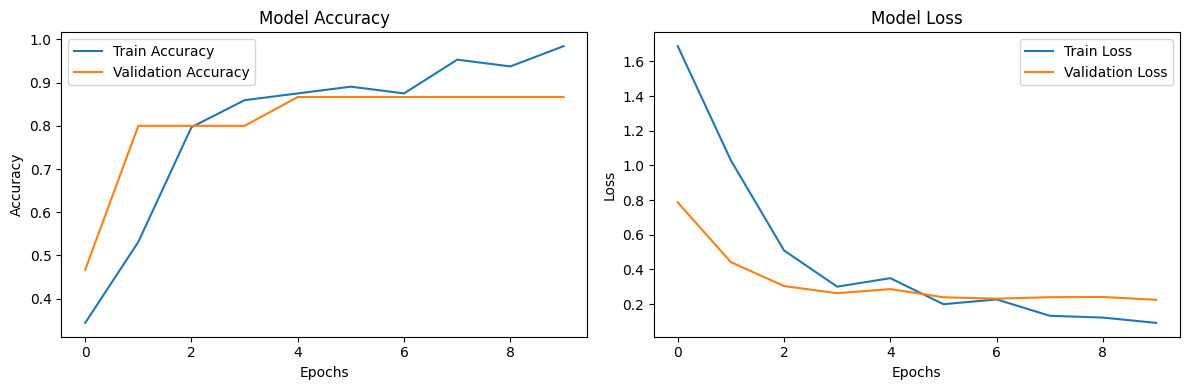

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


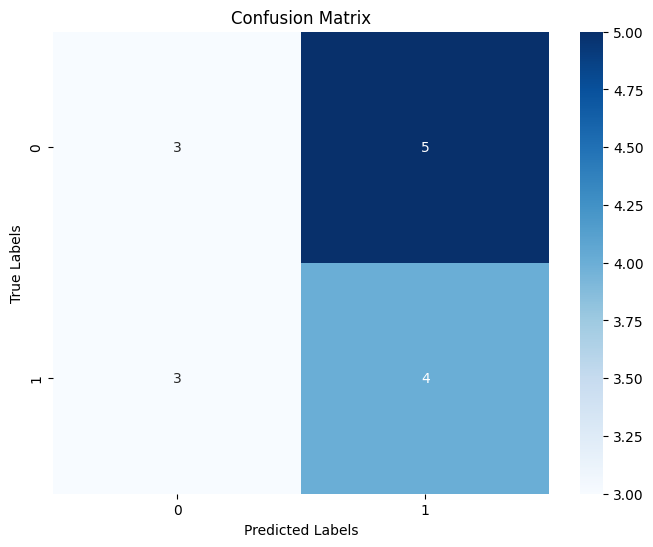

              precision    recall  f1-score   support

           0       0.50      0.38      0.43         8
           1       0.44      0.57      0.50         7

    accuracy                           0.47        15
   macro avg       0.47      0.47      0.46        15
weighted avg       0.47      0.47      0.46        15



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1180: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


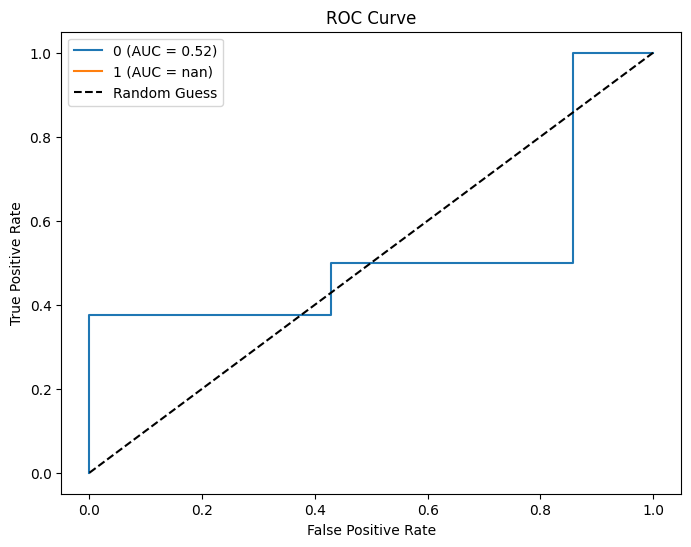

In [6]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Define directories
data_dir = '/content/resized_rice_leaf_diseases'  # Path to resized dataset

# Data generators
datagen = ImageDataGenerator(validation_split=0.2, rescale=1./255)

train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Adjust the Dense layer to match the number of classes
total_classes = len(train_generator.class_indices)

# Load VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Freeze base layers
for layer in base_model.layers:
    layer.trainable = False

# Build model
model = Sequential([
    base_model,
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(total_classes, activation='softmax')  # Dynamic adjustment based on the number of classes
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    verbose=1
)

# Plot accuracy and loss
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluate model
val_generator.reset()
y_pred = model.predict(val_generator)
y_true = val_generator.classes
class_labels = list(val_generator.class_indices.keys())

# Ensure target names match the number of classes
if len(class_labels) != len(np.unique(y_true)):
    class_labels = [str(i) for i in range(len(np.unique(y_true)))]

y_pred_classes = np.argmax(y_pred, axis=1)

# Confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Classification report
report = classification_report(y_true, y_pred_classes, target_names=class_labels)
print(report)

# ROC curve
plt.figure(figsize=(8, 6))
for i, label in enumerate(class_labels):
    fpr, tpr, _ = roc_curve(y_true == i, y_pred[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


In [7]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [8]:
data_dir = '/content/drive/MyDrive/rice leaf/Data'

In [9]:
import pathlib
data_dir=pathlib.Path(data_dir)
data_dir

PosixPath('/content/drive/MyDrive/rice leaf/Data')

In [10]:
list(data_dir.glob("*DSC*.jpg"))

[]

In [11]:
bacteria=list(data_dir.glob("Bacterial leaf blight/*"))
len(bacteria)

40

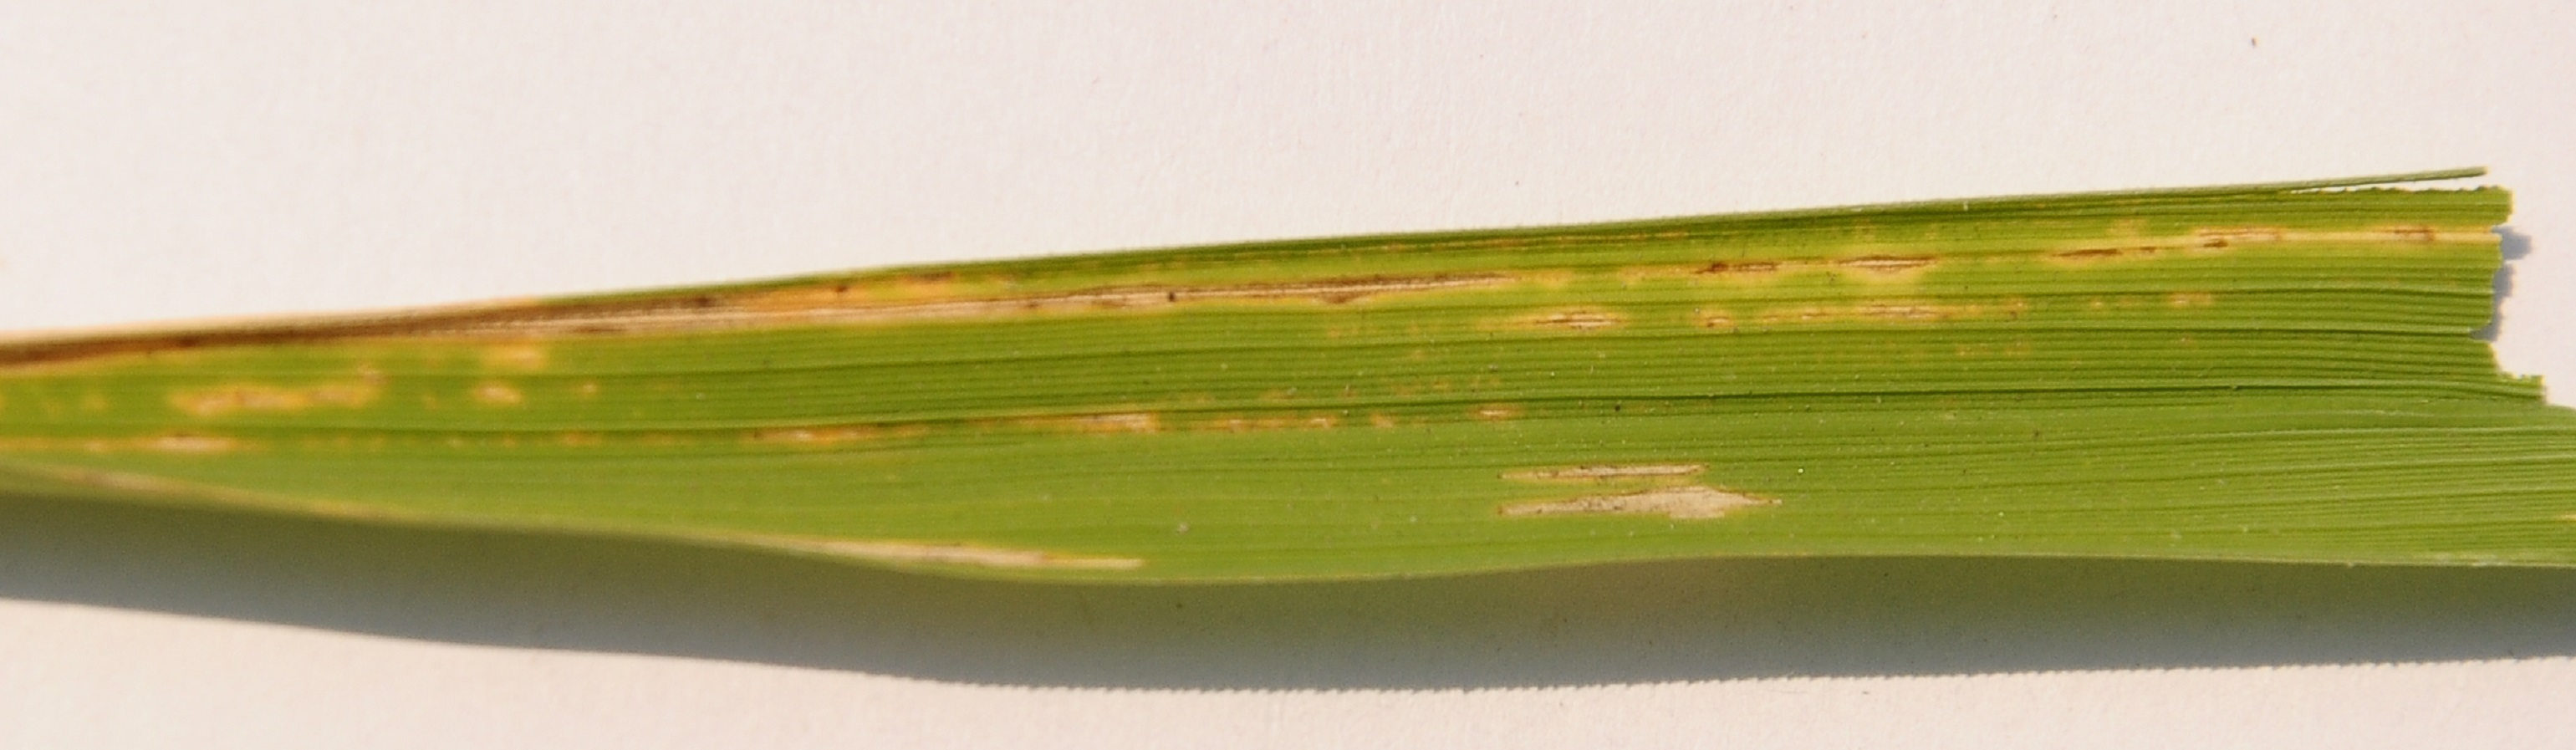

In [12]:
PIL.Image.open((bacteria[5]))

In [21]:
dict={"bacteria":list(data_dir.glob("Bacterial leaf blight/*")),"brown":list(data_dir.glob("Brown spot/*")),"smut":list(data_dir.glob("Leaf smut/*"))}
dict

{'bacteria': [PosixPath('/content/drive/MyDrive/rice leaf/Data/Bacterial leaf blight/DSC_0377.JPG'),
  PosixPath('/content/drive/MyDrive/rice leaf/Data/Bacterial leaf blight/DSC_0378.JPG'),
  PosixPath('/content/drive/MyDrive/rice leaf/Data/Bacterial leaf blight/DSC_0379.JPG'),
  PosixPath('/content/drive/MyDrive/rice leaf/Data/Bacterial leaf blight/DSC_0365.JPG'),
  PosixPath('/content/drive/MyDrive/rice leaf/Data/Bacterial leaf blight/DSC_0373.JPG'),
  PosixPath('/content/drive/MyDrive/rice leaf/Data/Bacterial leaf blight/DSC_0374.JPG'),
  PosixPath('/content/drive/MyDrive/rice leaf/Data/Bacterial leaf blight/DSC_0375.JPG'),
  PosixPath('/content/drive/MyDrive/rice leaf/Data/Bacterial leaf blight/DSC_0376.JPG'),
  PosixPath('/content/drive/MyDrive/rice leaf/Data/Bacterial leaf blight/DSC_0380.JPG'),
  PosixPath('/content/drive/MyDrive/rice leaf/Data/Bacterial leaf blight/DSC_0382.JPG'),
  PosixPath('/content/drive/MyDrive/rice leaf/Data/Bacterial leaf blight/DSC_0383.JPG'),
  PosixPa

In [22]:
labels_dict = {
    'bacteria': 0,
    'brown': 1,
    'smut': 2,
}
labels_dict

{'bacteria': 0, 'brown': 1, 'smut': 2}

In [17]:
str(dict["smut"][0])

'/content/drive/MyDrive/rice leaf/Data/Leaf smut/DSC_0308.JPG'

In [20]:
img=cv2.imread(str((dict["smut"][0])))
img



array([[[221, 227, 238],
        [222, 228, 239],
        [222, 228, 239],
        ...,
        [215, 223, 240],
        [214, 222, 239],
        [216, 224, 241]],

       [[221, 227, 238],
        [222, 228, 239],
        [222, 228, 239],
        ...,
        [216, 224, 241],
        [216, 224, 241],
        [217, 225, 242]],

       [[221, 227, 238],
        [221, 227, 238],
        [222, 228, 239],
        ...,
        [216, 224, 241],
        [217, 225, 242],
        [215, 223, 240]],

       ...,

       [[226, 231, 240],
        [226, 231, 240],
        [226, 231, 240],
        ...,
        [218, 226, 239],
        [218, 226, 239],
        [218, 226, 239]],

       [[226, 231, 240],
        [226, 231, 240],
        [226, 231, 240],
        ...,
        [218, 226, 239],
        [217, 225, 238],
        [218, 226, 239]],

       [[224, 230, 241],
        [223, 229, 240],
        [224, 230, 241],
        ...,
        [218, 225, 240],
        [216, 223, 238],
        [218, 225, 240]]

In [19]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [24]:
X, y = [], []

for name, images in dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(labels_dict[name])

X,Y = np.array(X), np.array(y)

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


In [26]:
len(X_test)

20

In [27]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [32]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import numpy as np # import numpy

# ... (rest of your code remains the same) ...

# Now you can fit the model
# Convert y_train to a NumPy array of type float32
y_train = np.array(y_train, dtype=np.float32)

model.fit(X_train_scaled, y_train, epochs=20, batch_size=128)

Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.3898 - loss: 1.0975
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - accuracy: 0.5424 - loss: 0.9367
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - accuracy: 0.4576 - loss: 5.7754
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - accuracy: 0.4576 - loss: 2.1247
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.5763 - loss: 0.6400
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step - accuracy: 0.5424 - loss: 0.7446
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.5932 - loss: 0.6786
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.4576 - loss: 0.7384
Epoch 9/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.7966 - loss: 0.6345
Epoch 10/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - accuracy: 0.6780 - loss: 0.5810
Epoch 11/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.7288 - loss: 0.5283
Epoch 12/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.5763 - loss: 0.5574
Epoch 13/20
1/1 ━━━━━━━

In [36]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import numpy as np # import numpy

# Define the model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(180, 180, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax') # 3 classes: bacteria, brown, smut
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Now you can fit the model
# Convert y_train to a NumPy array of type float32
y_train = np.array(y_train, dtype=np.float32)

model.fit(X_train_scaled, y_train, epochs=20, batch_size=128)

# Evaluate the model
# Ensure X_test_scaled and y_test have the correct data type
X_test_scaled = X_test_scaled.astype('float32')  # Convert to float32
y_test = np.array(y_test, dtype=np.float32)  # Convert to float32 if needed

# If you are using TensorFlow 2.x, you can also try:
# tf.config.run_functions_eagerly(True)
# before model.evaluate to force eager execution,
# which can sometimes help with data type issues.

model.evaluate(X_test_scaled, y_test)

Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - accuracy: 0.4407 - loss: 1.0732
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - accuracy: 0.5424 - loss: 1.7696
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - accuracy: 0.4576 - loss: 1.7381
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.4576 - loss: 0.9252
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.4576 - loss: 0.6990
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.5932 - loss: 0.6882
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.5932 - loss: 0.6435
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - accuracy: 0.7966 - loss: 0.6159
Epoch 9/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.6271 - loss: 0.6083
Epoch 10/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.7458 - loss: 0.5681
Epoch 11/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.7288 - loss: 0.5169
Epoch 12/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.8136 - loss: 0.4513
Epoch 13/20
1/1 ━━━━━━━━━

[0.31114551424980164, 0.8999999761581421]

In [51]:
predictions = model.predict(X_test_scaled)
predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 680ms/step


array([[3.3211473e-01, 1.7831431e-07, 6.6788507e-01],
       [9.4313073e-01, 7.7849832e-10, 5.6869324e-02],
       [9.1542441e-01, 1.6248440e-09, 8.4575556e-02],
       [7.2114193e-01, 3.3482390e-09, 2.7885798e-01],
       [4.6886930e-01, 8.6874259e-08, 5.3113055e-01],
       [7.8377547e-03, 7.0483228e-09, 9.9216229e-01],
       [3.3103484e-01, 1.2956913e-08, 6.6896516e-01],
       [3.9196664e-01, 4.6784518e-08, 6.0803336e-01],
       [4.6949533e-01, 6.0967054e-08, 5.3050470e-01],
       [2.4245473e-02, 3.2668733e-08, 9.7575450e-01],
       [7.8548026e-01, 1.2767657e-08, 2.1451975e-01],
       [1.2885739e-01, 1.9852564e-12, 8.7114263e-01],
       [9.4876760e-01, 6.7135614e-10, 5.1232498e-02],
       [1.6420205e-01, 1.3555164e-08, 8.3579797e-01],
       [5.7392949e-03, 1.1442334e-09, 9.9426067e-01],
       [9.7285682e-01, 1.4400221e-09, 2.7143091e-02],
       [8.9405465e-01, 4.2924047e-09, 1.0594540e-01],
       [9.0536875e-01, 4.5974176e-09, 9.4631284e-02],
       [9.7628403e-01, 1.228